In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

1. Получение данных и загрузка их в рабочую среду.

In [ ]:
# Загрузка данных в датафрейм pandas
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [ ]:
# Описание данных в датафрейме
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. Проверка данных на наличие пропусков. Удаление их в случае обнаружения.

In [ ]:
# Проверка на наличие пропусков, вывод списка столбцов, в которых они есть
null_list = []
for el in list(data.columns.values):
  if data[el].isnull().sum() != 0:
    null_list.append(el)
print(f'Список столбоцв с пропусками  - {null_list}.')

Список столбоцв с пропусками  - [].


Пропусков в данных нет.

3. Деление выборки на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
list(data.columns.values)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'target']

In [ ]:
# Признаки и целевая переменная
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']]
y = data[['target']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Построение модели линейной регрессии. Вычисление метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
def modeling(X_train, y_train, X_test, y_test):
  # Функция для обучения модели логистической регрессии. На вход принимает наборы тренировочных и тестовых данных (признаки и целевая переменная).
  # На выходе выдает метрики RMSE и R2 для тренировочной и тестовой выборки.

  # Инициализация модели
  model = LinearRegression()
  # Обучение модели
  model.fit(X_train, y_train)
  # RMSE для тренировочной выборки
  RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train)))
  # RMSE для тестовой выборки
  RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
  # R2 для тренировочной выборки
  r2_train = metrics.r2_score(y_train, model.predict(X_train))
  # R2 для тестовой выборки
  r2_test = metrics.r2_score(y_test, model.predict(X_test))

  return print(f'RMSE для тренировочной выборки - {round(RMSE_train, 4)}\nRMSE для тестовой выборки - {round(RMSE_test, 4)}\nR2 для тренировочной выборки - {round(r2_train, 4)}\nR2 для тестовой выборки - {round(r2_test, 4)}')

In [ ]:
modeling(X_train, y_train, X_test, y_test)

RMSE для тренировочной выборки - 0.7197
RMSE для тестовой выборки - 0.7456
R2 для тренировочной выборки - 0.6126
R2 для тестовой выборки - 0.5758


5. Построение графика распределения целевой переменной. Сделать вывод. Присутствуют ли в этом признаке выбросы?

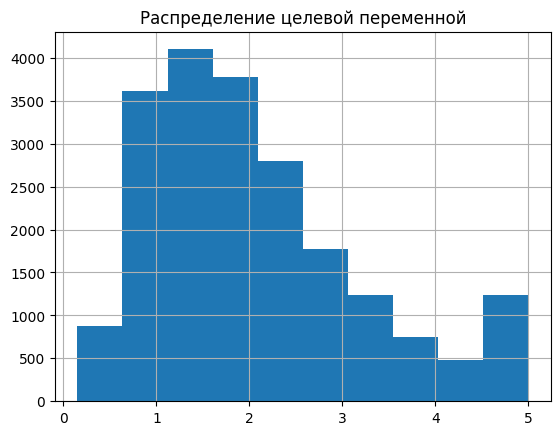

In [ ]:
# Построение график распределения целевой переменной
plt.hist(data['target'])
plt.title('Распределение целевой переменной')
plt.grid()
plt.show()

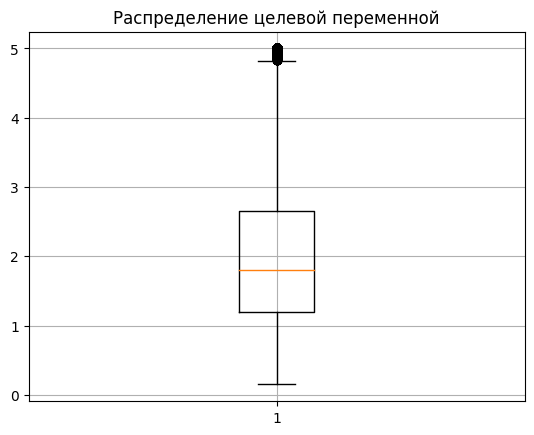

In [ ]:
# Построение boxplot для целевой переменной
plt.boxplot(data['target'])
plt.title('Распределение целевой переменной')
plt.grid()
plt.show()

По совокупности представленных графиков можно говорить о наличии умеренных выбросов в целевой переменной.

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [ ]:
# Создание корреляционной матрицы
matrix_corr = data.corr()
# Вывод корреляционной матрицы
matrix_corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Выводы: коэффициент корреляции между признаками 'AveRooms' и 'AveBedrms' достаточно близок к 1, что говорит о высокой степени корряляции между этими признаками. Один из них можно удалить. Удалим 'AveBedrms'.

In [ ]:
data.drop(['AveBedrms'], axis= 1 , inplace= True )

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup','Latitude', 'Longitude']]
y = data[['target']]

Повторю деление данных на тестовую и обучающую выборку и обучение модели.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modeling(X_train, y_train, X_test, y_test)

RMSE для тренировочной выборки - 0.7317
RMSE для тестовой выборки - 0.7398
R2 для тренировочной выборки - 0.5995
R2 для тестовой выборки - 0.5823


Принципиально метрики не изменились. R2 немного уменьшилась на тренировочных данных, но выросла на тестовой выборке. Однако, при этом мы использовали на один признак меньше, а значит чуть облегчили работу модели.

7. Исследуйте оставленные признаки на выбросы.

In [ ]:
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


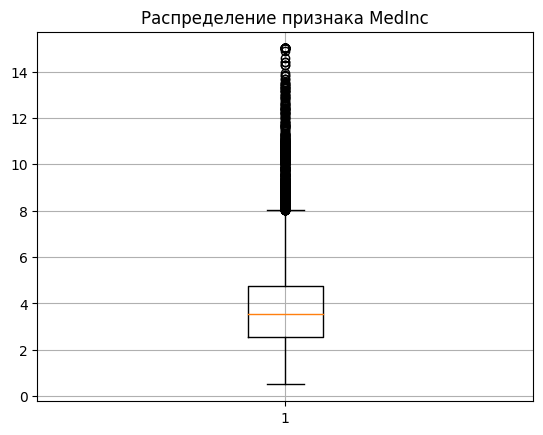

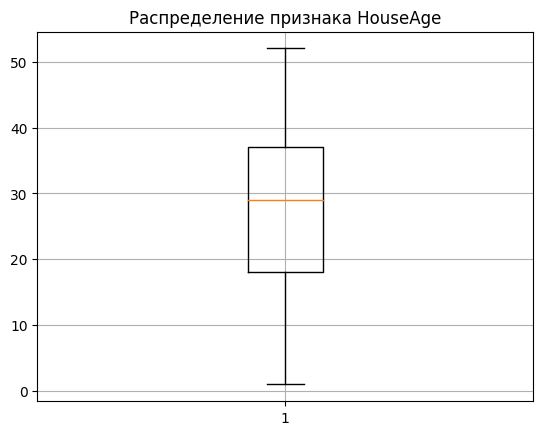

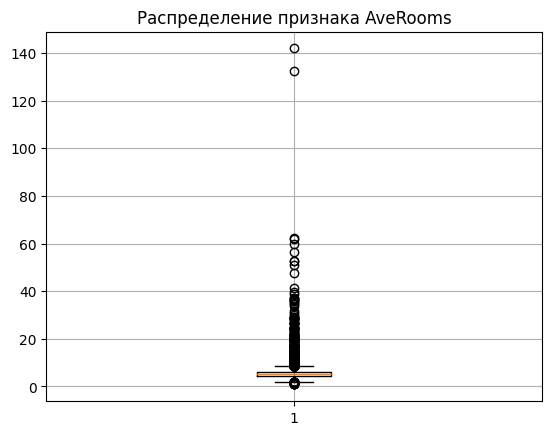

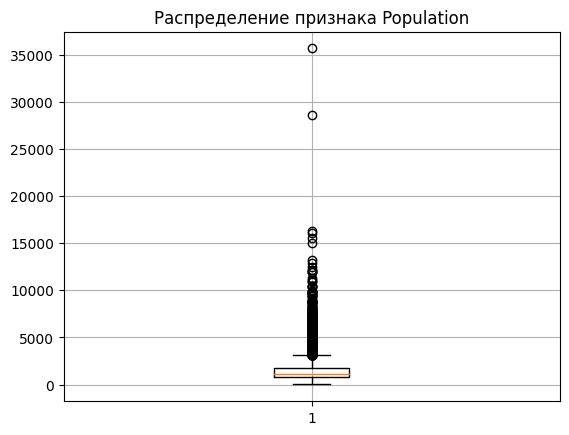

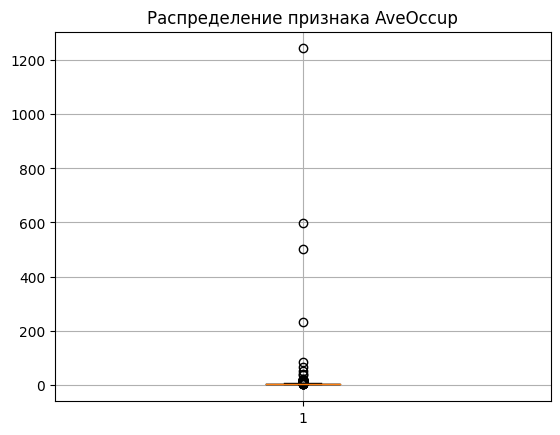

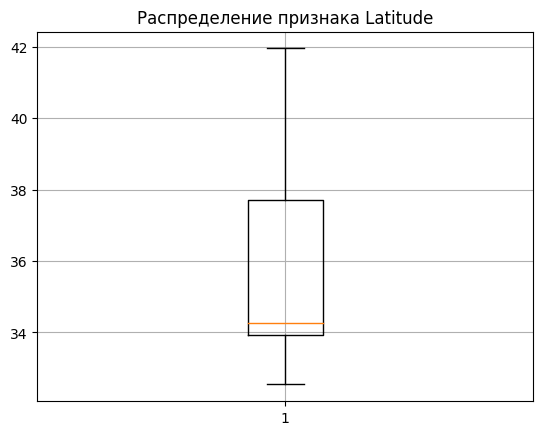

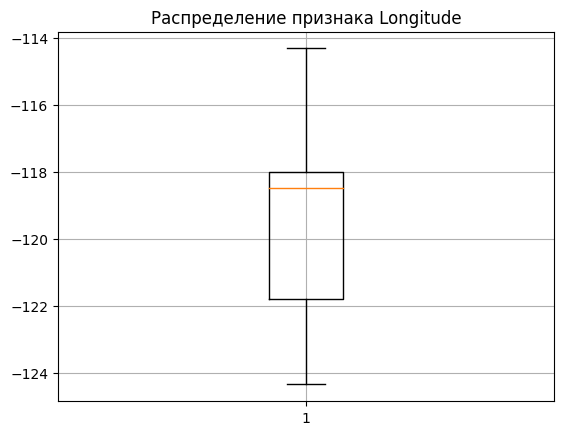

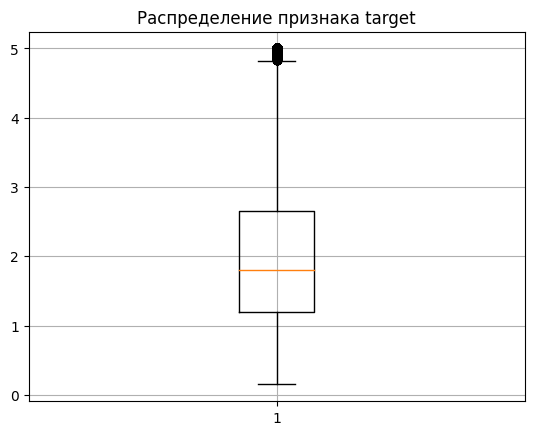

In [ ]:
# Постром для каждого признака boxplot
for el in list(data.columns.values):
  plt.boxplot(data[el])
  plt.title(f'Распределение признака {el}')
  plt.grid()
  plt.show()

По ним можно определить, что выбросы есть в признакаха 'MedInc', 'AveRooms', 'Population', 'AveOccup'.

Удалим выбросы.

In [ ]:
columns = ['MedInc', 'AveRooms', 'Population', 'AveOccup']

In [ ]:
# Создадим функцию, которая удалить выбросы в столбцах из списка
def remove_outler(data, list_column):
  for column in list_column:
    # вычисляем 1 и 3 квартиль и межквартильный размах
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # Определим границы, за пределами которых будут находиться выбросы
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    # Оставляем в датафрейме только те строки, значения в которых находятся внутри посчитанных границ
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

  return data

In [ ]:
data = remove_outler(data, columns)
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Разобъем данные на признаки и целевую переменную, разделим на обучующую и тестовую выборку и проведем моделирование
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup','Latitude', 'Longitude']]
y = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modeling(X_train, y_train, X_test, y_test)

RMSE для тренировочной выборки - 0.661
RMSE для тестовой выборки - 0.6683
R2 для тренировочной выборки - 0.6237
R2 для тестовой выборки - 0.6227


Вижу улучшение ситуации: метрика RMSE уменьшилась, а R2 - наоборот увеличилась, что говорит о том, что качество работы модели хоть немного, но улучшилось.

8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1157.0,1.788253,37.84,-122.25,2.414


Прологарифмирую столбец 'Population' и извлечем квадратный корень из столбца 'HouseAge'.

In [ ]:
data['LogPopulation'] = np.log(data['Population'])
data['SqrtHouseAge'] = np.sqrt(data['HouseAge'])
data.drop(['Population', 'HouseAge'], axis= 1 , inplace= True )

In [ ]:
data.head()

,MedInc,AveRooms,AveOccup,Latitude,Longitude,target,LogPopulation,SqrtHouseAge
3,5.6431,5.817352,2.547945,37.85,-122.25,3.413,6.324359,7.211103
4,3.8462,6.281853,2.181467,37.85,-122.25,3.422,6.336826,7.211103
5,4.0368,4.761658,2.139896,37.85,-122.25,2.697,6.023448,7.211103
6,3.6591,4.931907,2.128405,37.84,-122.25,2.992,6.997596,7.211103
7,3.1200,4.797527,1.788253,37.84,-122.25,2.414,7.053586,7.211103


In [ ]:
# Разобъем данные на признаки и целевую переменную, разделим на обучующую и тестовую выборку и проведем моделирование
X = data[['MedInc', 'SqrtHouseAge', 'AveRooms', 'LogPopulation', 'AveOccup','Latitude', 'Longitude']]
y = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modeling(X_train, y_train, X_test, y_test)

RMSE для тренировочной выборки - 0.6624
RMSE для тестовой выборки - 0.6707
R2 для тренировочной выборки - 0.6221
R2 для тестовой выборки - 0.6199


Выводы:
1. В ходе выполнения работы с данными проводились преобразование: поиск и удаление пропусков, поиск признаков, коррелирующих друг с другом и удаление части из них, поиск и устранение выбросов в данных и математические преобразования с данными.
2. Метрики моделей:
* первая модель, до преобразования: RMSE для тестовой выборки - 0.7456, R2 для тренировочной выборки - 0.6126.
* вторая модель, после удаления признака 'AveBedrms', который коррелировал с 'AveRooms': RMSE для тестовой выборки - 0.7398, R2 для тренировочной выборки - 0.5995.
* третья модель, после удаления выбросов из признаков 'MedInc', 'AveRooms', 'Population', 'AveOccup': RMSE для тестовой выборки - 0.6683,R2 для тренировочной выборки - 0.6237.
* четвертая модель, после математического преобрвзования столбцов, логарифмировани признака 'Population' и извлечение квадратного корень из признака 'HouseAge': RMSE для тестовой выборки - 0.6707, R2 для тренировочной выборки - 0.6221.
3. Считаю, что модель в полной мере справилась со своей задачей, но метрики качества все-таки хотелось бы получать выше на практике.
